## Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored as cl
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Import dataset

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

## Process data and some Exploratory Data Analysis (EDA)

In [3]:
#Percentage of fraud cases

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases)))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count)))
print(cl('Number of fraud cases are {}'.format(fraud_count)))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage)))
print(cl('--------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------


In [4]:
#Statistical view of both fraud and non-fraud transaction amount data

nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('|'))
print(cl('----------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('----------------------------------'))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('----------------------------------'))

CASE AMOUNT STATISTICS
|
----------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
----------------------------------


In [5]:
#Normalize the Amount variable

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## Split the dataset into train and test data

In [6]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Testing the model using six classification models

In [7]:
#Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [8]:
#K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [9]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [10]:
#SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [11]:
#Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [12]:
#XGBoost

xgb = XGBClassifier(max_depth = 4, use_label_encoder=False)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

[19:13:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Models evaluation

In [13]:
#Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


In [14]:
#F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat))))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat))))
print(cl('---------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
---------------------------


In [15]:
#Confusion Matrix

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

#Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

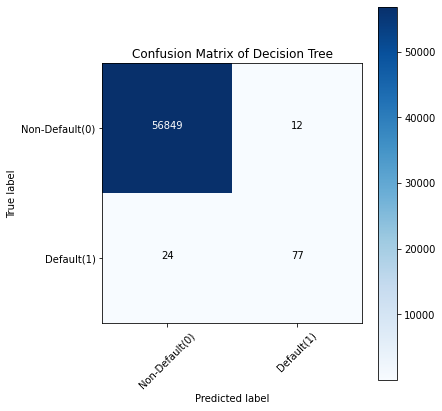

In [16]:
#Confusion matrix for Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'Decision Tree')

plt.savefig('tree_cm_plot.png')
plt.show()

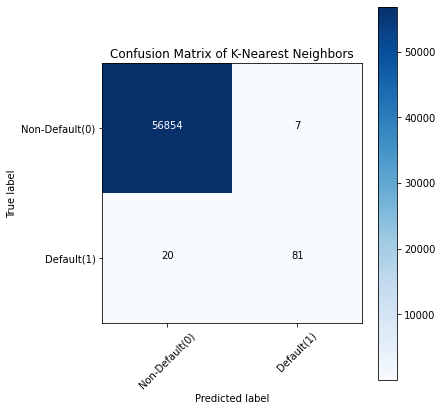

In [17]:
#Confusion matrix for K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'K-Nearest Neighbors')

plt.savefig('knn_cm_plot.png')
plt.show()

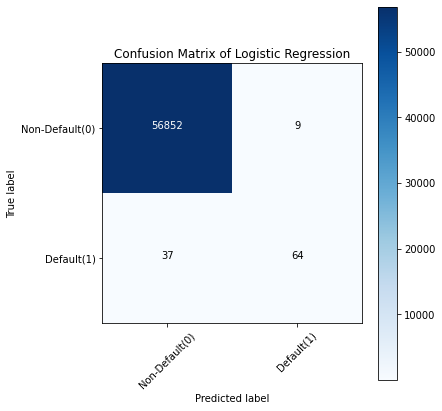

In [18]:
#Confusion matrix for Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'Logistic Regression')

plt.savefig('lr_cm_plot.png')
plt.show()

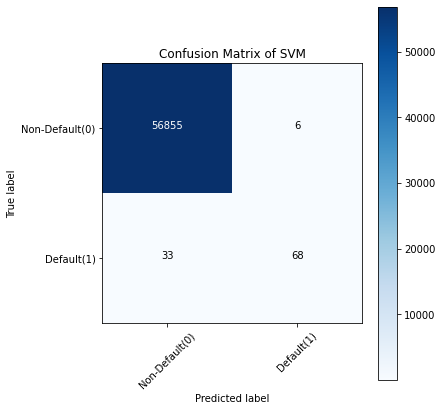

In [19]:
#Confusion matrix for Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'SVM')

plt.savefig('svm_cm_plot.png')
plt.show()

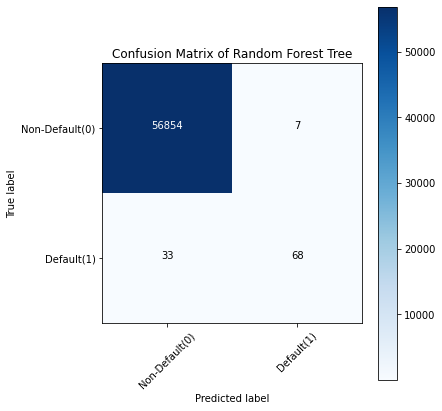

In [20]:
#Confusion matrix for Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'Random Forest Tree')

plt.savefig('rf_cm_plot.png')
plt.show()

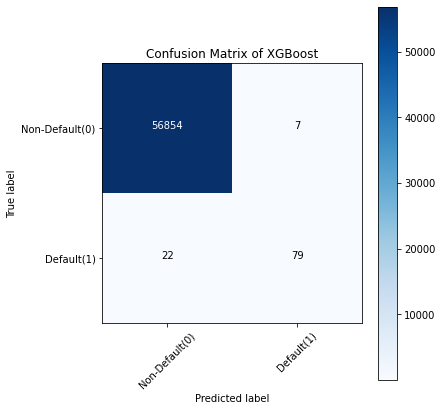

In [21]:
#Confusion matrix for XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
classes = ['Non-Default(0)','Default(1)'], 
normalize = False, title = 'XGBoost')

plt.savefig('xgb_cm_plot.png')
plt.show()

## Test model with new transactions

In [22]:
trans = [[0.32333357, 1.05745525, 1.04834115, 0.60720431, 1.25982115, 1.09176072,
   1.1591015, 1.12433461, 1.17463954, 1.64440065, 0.11886302, 1.20264731,
   1.14596495, 1.80235956, 1.24717793, 1.06094535, 1.84660574, 1.37945439,
   1.84726224, -0.18640942, 1.20709827, 0.43389027, 1.26161328, 1.04665061,
   1.2115123, 1.00829721, 1.10849443, 1.16113917, -0.19330595]]

result = knn.predict(trans)
print(result)

[0]


## Save model in SAV format

In [23]:
import pickle

filename = 'credit_card_fraud_detection.sav'
pickle.dump(knn, open(filename, 'wb'))

## Load saved model and test

In [24]:
filename = './credit_card_fraud_detection.sav'
loaded_model = pickle.load(open(filename, 'rb'))

trans = [[-0.32333357, 1.05745525, -0.04834115, -0.60720431, 1.25982115, -0.09176072,
   1.1591015, -0.12433461, -0.17463954, -1.64440065, -1.11886302, 0.20264731,
   1.14596495, -1.80235956, -0.24717793, -0.06094535, 0.84660574, 0.37945439,
   0.84726224, 0.18640942, -0.20709827, -0.43389027, -0.26161328, -0.04665061,
   0.2115123, 0.00829721, 0.10849443, 0.16113917, -0.19330595]]

result = loaded_model.predict(trans)
print(result)

[0]
